# Lab | Imbalanced data

We will be using the `files_for_lab/customer_churn.csv` dataset to build a churn predictor.

Instructions

1. Load the dataset and explore the variables.
2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
8. **Synthetic Minority Oversampling TEchnique (SMOTE)** is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE


## Importing the data 

In [2]:
data = pd.read_csv('customer_churn.csv')

### Using only the columns that are required and checking dtypes

In [3]:
data = data[['tenure','SeniorCitizen','MonthlyCharges','Churn']]
display(data.head())
data.dtypes

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
Churn              object
dtype: object

No NaN's at our work columns, so no further work required at this point

In [4]:
data.isna().sum()

tenure            0
SeniorCitizen     0
MonthlyCharges    0
Churn             0
dtype: int64

We can se an obvious high imbalance Between Yes and No results.

In [5]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Visual check on data distribuition and range of our features

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

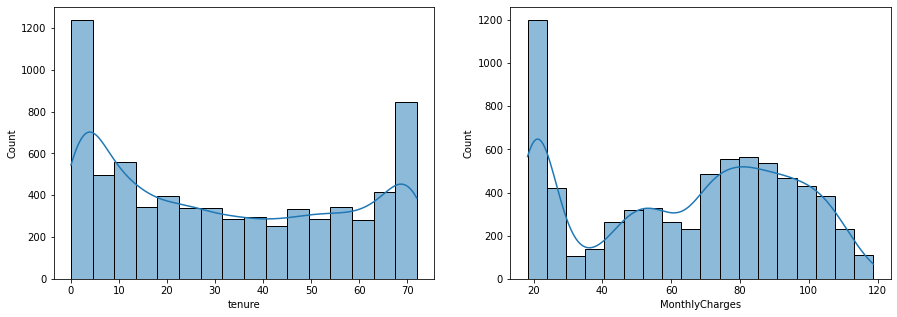

In [6]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data['tenure'], kde=True, ax = axes[0])
sns.histplot(data['MonthlyCharges'], kde=True, ax = axes[1])

Function to replace Yes and No text by 1 and 0 

In [7]:
def convert(x):
    if x == 'Yes':
        return 1
    else:
        return 0

### X-y train test split

In [8]:
y = data['Churn']
y = y.apply(convert)
y = y.reset_index(drop=True)
     
X = data.drop('Churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

### Creating Min max Scaler transformer, fitting the train set and applying to both X sets

In [9]:
transformer = MinMaxScaler().fit(X_train)

def min_max(Xnum):
    return pd.DataFrame(transformer.transform(Xnum), columns=Xnum.columns)

In [10]:
# X_train scaling
X_train = min_max(X_train)
X_test = min_max(X_test)

### Creating the logistics regression

In [11]:
regression = LogisticRegression(random_state=0, solver='lbfgs')
regression.fit(X_train, y_train)
pred = regression.predict(X_test)

### Assess results

In [12]:
print('Logistic regression Model: ',round(regression.score(X_test, y_test)*100,2),'%')
print("precision: ",precision_score(y_test,pred))
print("recall: ", recall_score(y_test,pred))
print("f1: ", f1_score(y_test,pred))

confusion_matrix(y_test,pred)

Logistic regression Model:  78.64 %
precision:  0.6404494382022472
recall:  0.45478723404255317
f1:  0.5318818040435459


array([[937,  96],
       [205, 171]], dtype=int64)

## Applying SMOTE 

In [13]:
smote = SMOTE(random_state=100, k_neighbors=3)
X_S,y_S = smote.fit_resample(X_train,y_train)

In [14]:
regression.fit(X_S, y_S)
pred = regression.predict(X_test)

print('Logistic regression Model: ',round(regression.score(X_test, y_test)*100,2),'%')
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))
confusion_matrix(y_test,pred)

Logistic regression Model:  73.17 %
precision:  0.49818840579710144
recall:  0.7313829787234043
f1:  0.5926724137931035


array([[756, 277],
       [101, 275]], dtype=int64)

# Conclusions

## Even a simple model will give us more than 70% accuracy. Why?

Considering that the NO answer of Churn is actually more than 70% of the dataset, if the model predicts all NO, it will be already mores than 70% efficient, wich might seem to be acceptable but in reallity isn't much more than guessing by default the right answer, so we can't just look at accuracy, we have to evaluate all metrics before commiting the model to final usage.

## Build and evaluate the logistic regression model using SMOTE, is it there any improvement?

Using Smote hasn't improved the overall score, in fact, it decreases by 5%. Although, the recall and combined f1 scores are higher, in fact, recall goes up by a big 30%, If we look at the confusion matrix of each step we can also see this diferent results and caractheristics in first hand.
Taking into account that the dataset is so imbalanced the solution will never be ideal, and in this case with smote creating nearly 3000 rows out of 1900 will have its own problems and will not make the model much better, just improve it in certain areas that may or may not help us.


## The optimal solution

There isn't a better model. I tested Kneighbours and logistic regression with both undersampling, oversampling and a mix of both just to realize that the results never surpass any metric of any of the previous models.

In [15]:
!git add

Everything up-to-date
